### Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

### Selecting Color Palatte

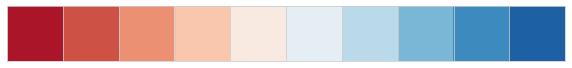

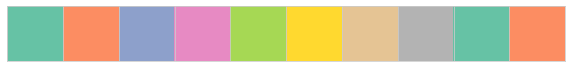

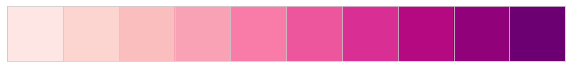

In [50]:
diverging_colors = sns.color_palette("RdBu", 10)
sns.palplot(diverging_colors)

qualitative_colors = sns.color_palette('Set2', 10)
sns.palplot(qualitative_colors)

sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)

In [96]:
df = pd.read_csv('xAPI-Edu-Data.csv')

df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
raisedhands,480.0,46.775000,30.779223,0.0,15.75,50.0,75.0,100.0
VisITedResources,480.0,54.797917,33.080007,0.0,20.00,65.0,84.0,99.0
AnnouncementsView,480.0,37.918750,26.611244,0.0,14.00,33.0,58.0,98.0
Discussion,480.0,43.283333,27.637735,1.0,20.00,39.0,70.0,99.0


In [54]:
df.describe(include='object').T

,count,unique,top,freq
gender,480,2,M,305
NationalITy,480,14,KW,179
PlaceofBirth,480,14,KuwaIT,180
StageID,480,3,MiddleSchool,248
GradeID,480,10,G-02,147
SectionID,480,3,A,283
Topic,480,12,IT,95
Semester,480,2,F,245
Relation,480,2,Father,283
ParentAnsweringSurvey,480,2,Yes,270


### EDA

In [55]:
cat_cols_all = df.select_dtypes(include='object').columns
cat_cols = df.select_dtypes(include='object').columns[:-1]
num_cols = df.select_dtypes(exclude='object').columns
print(cat_cols)
print(num_cols)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays'],
      dtype='object')
Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object')


In [56]:
df.Class.value_counts(sort=False).round(2).values

array([211, 127, 142], dtype=int64)

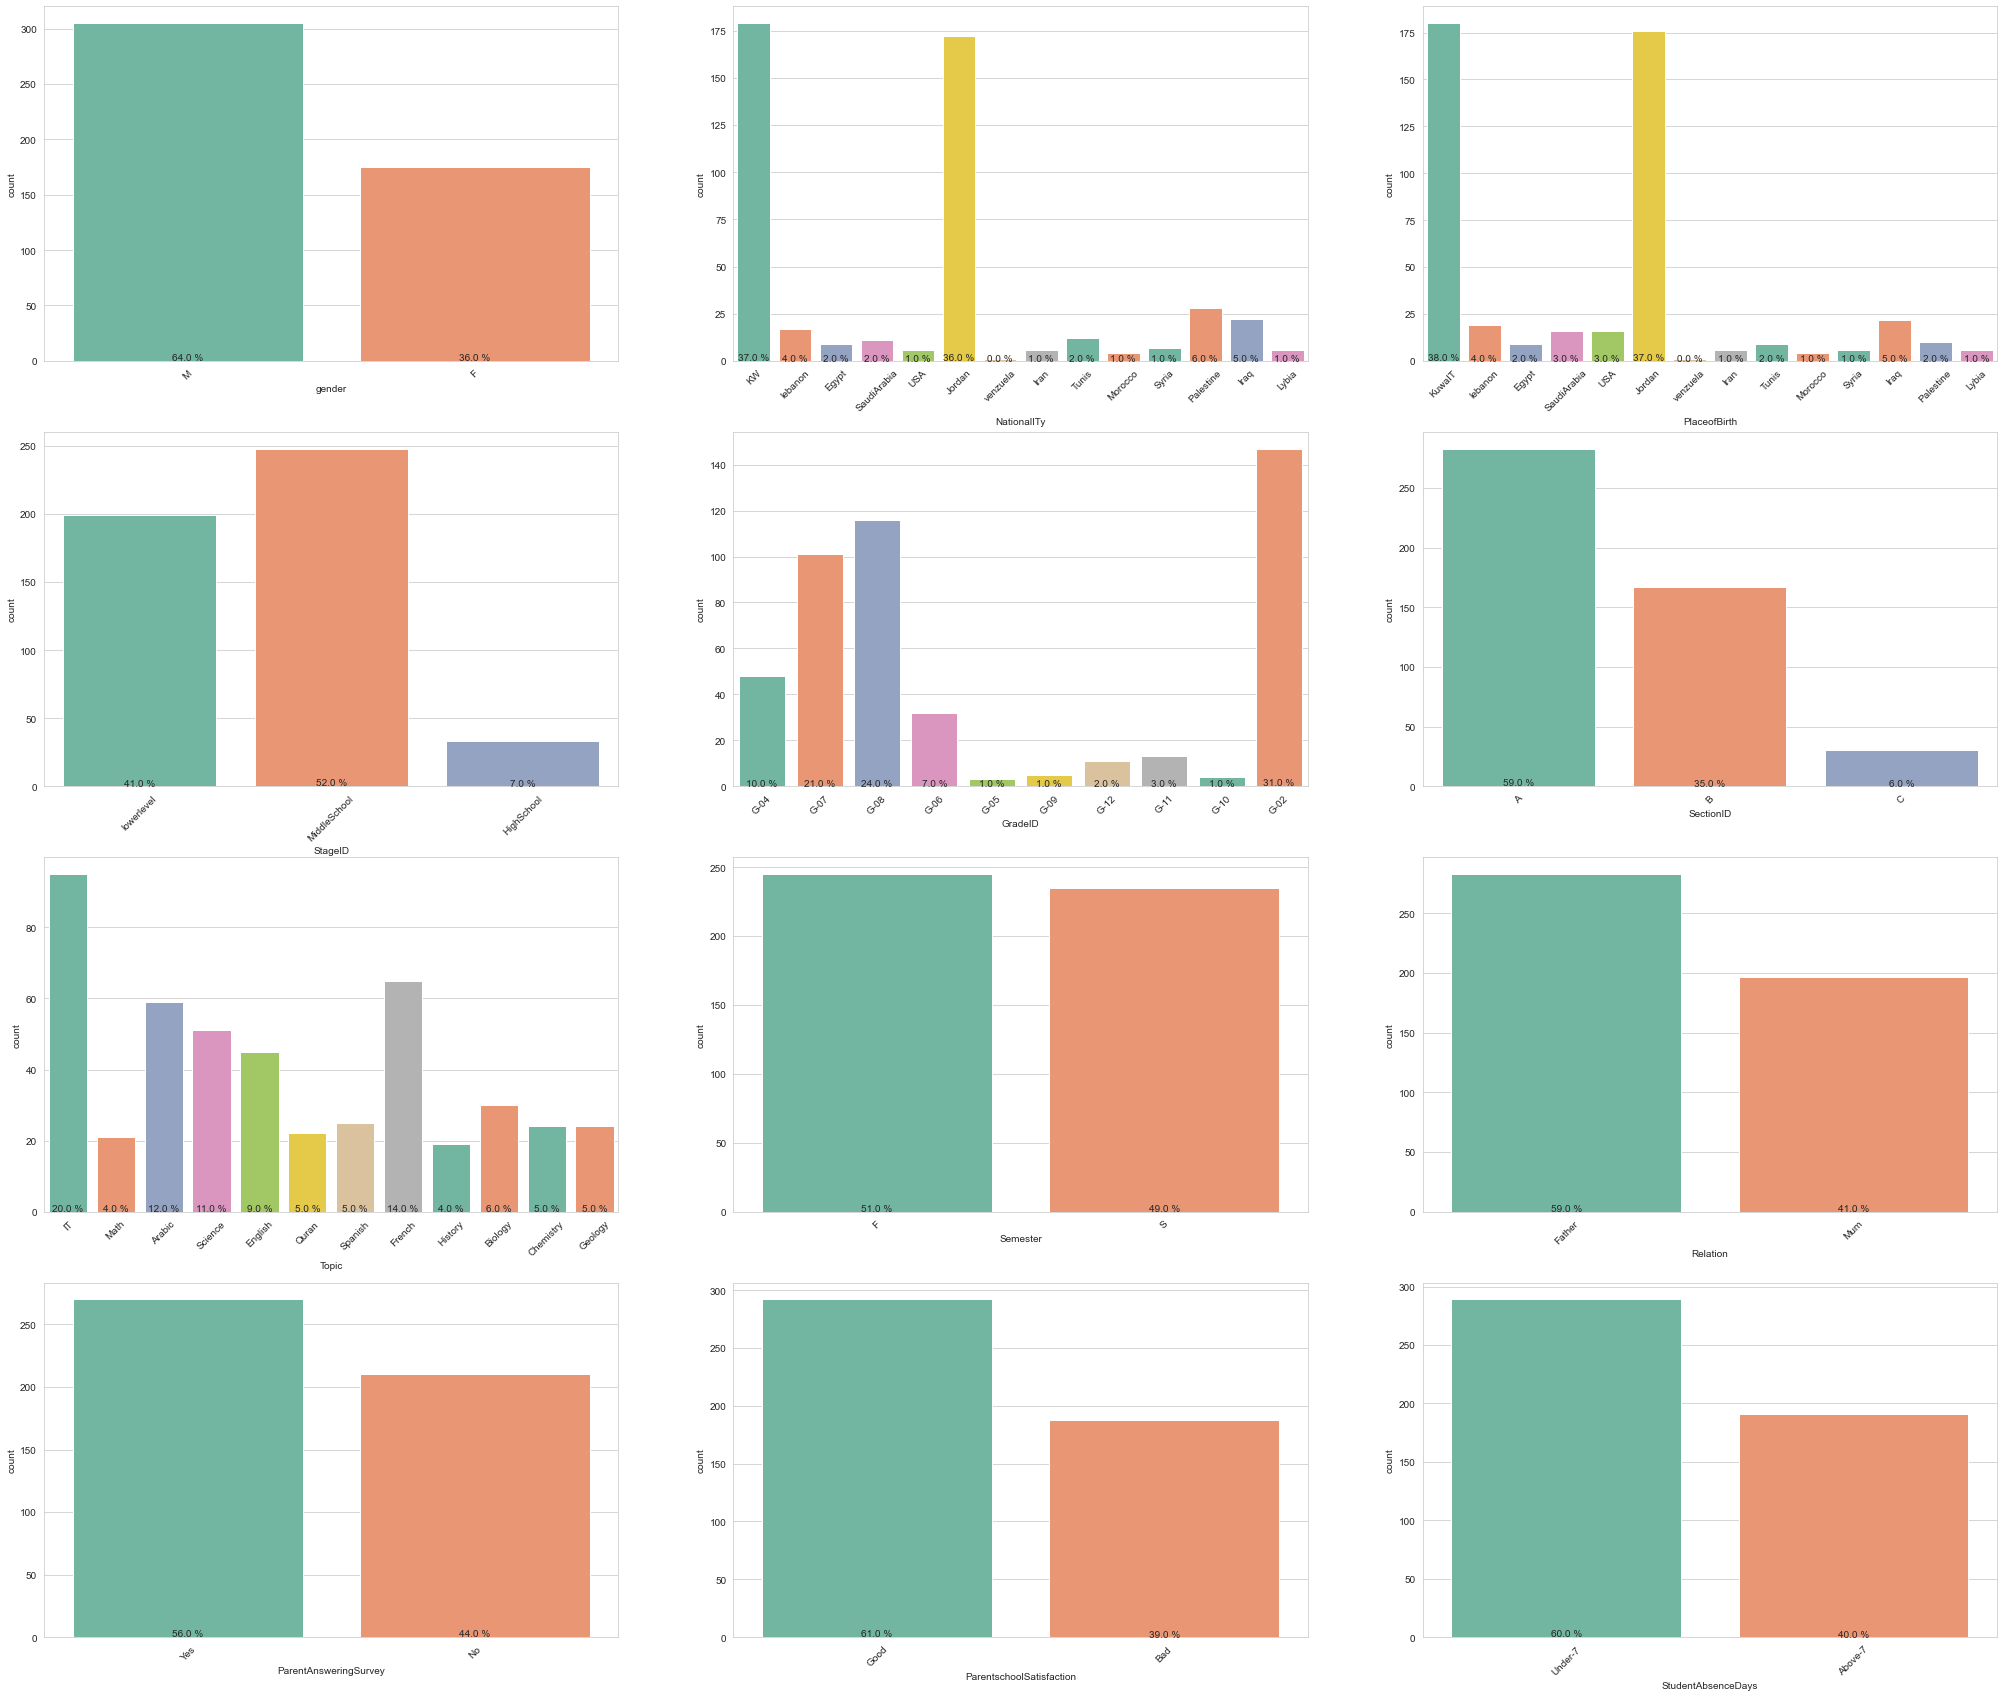

In [57]:
fig = plt.figure(figsize=(35, 30))

for i in range(1, len(cat_cols) + 1):
    plt.subplot(4, 3, i)
    sns.countplot(df[cat_cols[i-1]], palette=qualitative_colors)
    plt.xticks(rotation= 45)
    for idx, value in enumerate(df[cat_cols[i-1]].value_counts(normalize=True, sort=False).round(2).values):
        plt.text(idx, value, str(round(value * 100, 2))  + ' %', va='baseline', ha='center')

plt.show()

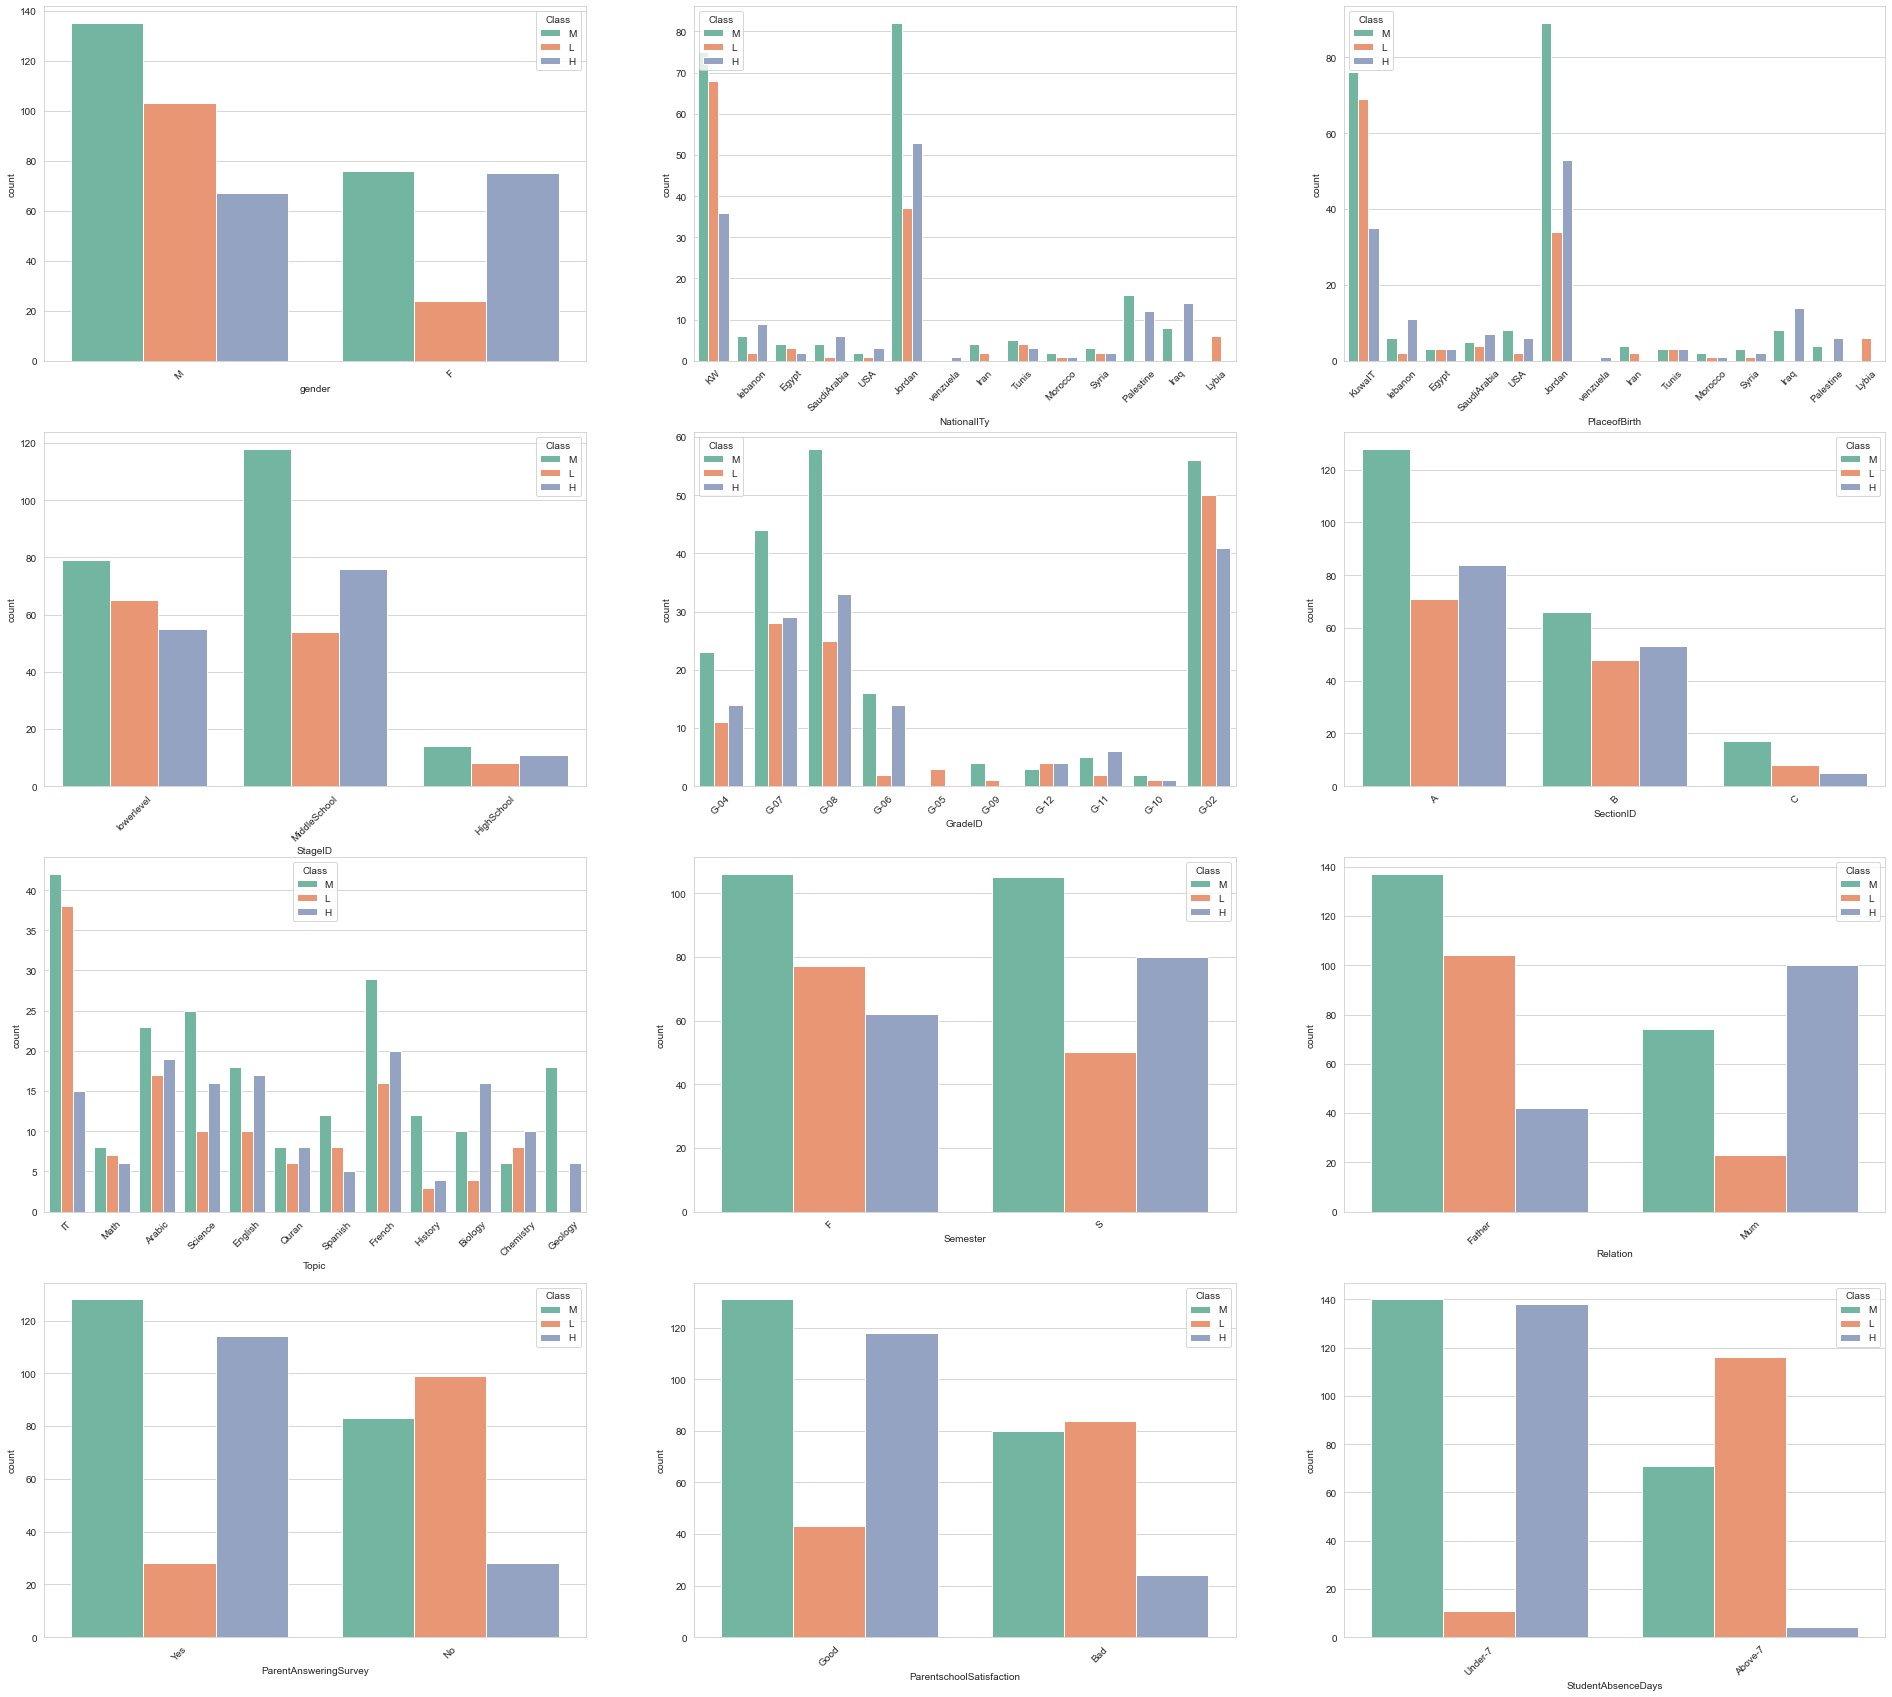

In [58]:
fig = plt.figure(figsize=(33, 30))
j = 1

for i in cat_cols:
    plt.subplot(4, 3, j)
    sns.countplot(df[i], hue=df['Class'], palette=qualitative_colors)
    plt.xticks(rotation = 45)
    j += 1

Conclusion:
1. 63.5 % of the students are Male.
2. Most of the students are from Kuwait & Jordan
3. Most of the students are from Lower Level & Middle School students
6. Students that were absent more than 7 days are having low score.
7. Female students are having better scores than Male students.

<AxesSubplot:xlabel='GradeID', ylabel='count'>

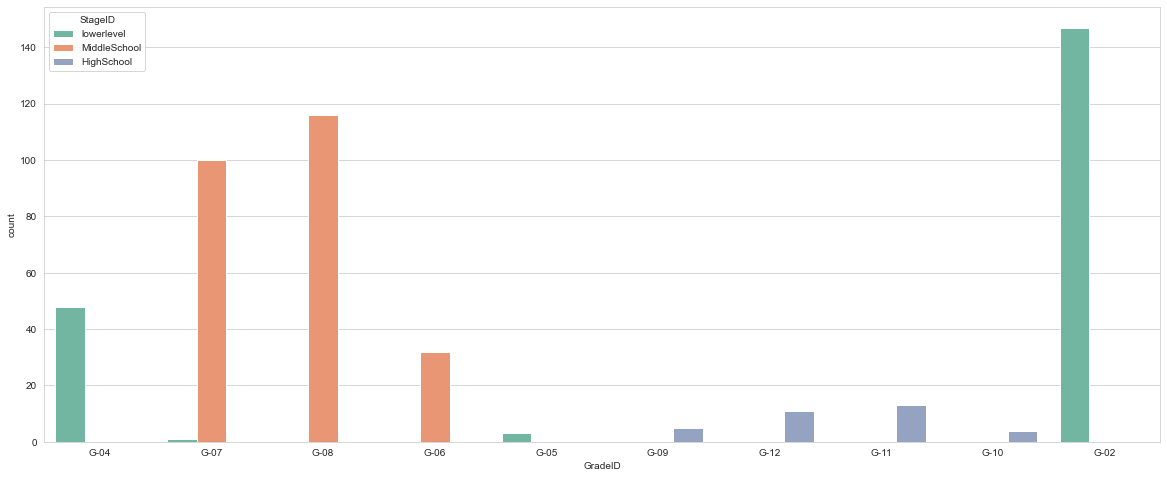

In [59]:
plt.figure(figsize=(20, 8))
sns.countplot(df['GradeID'], hue=df['StageID'], palette=qualitative_colors)

Conclusion:
1. Higher the stage lower the grades.
2. Lower Level Stdents are having good grades (G-02 TO G-04), Middle School students are having the grades bad grades (G-06 to G-08) and High School Students are having worse grades (G-09 to G-12)

In [60]:
num_cols

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object')

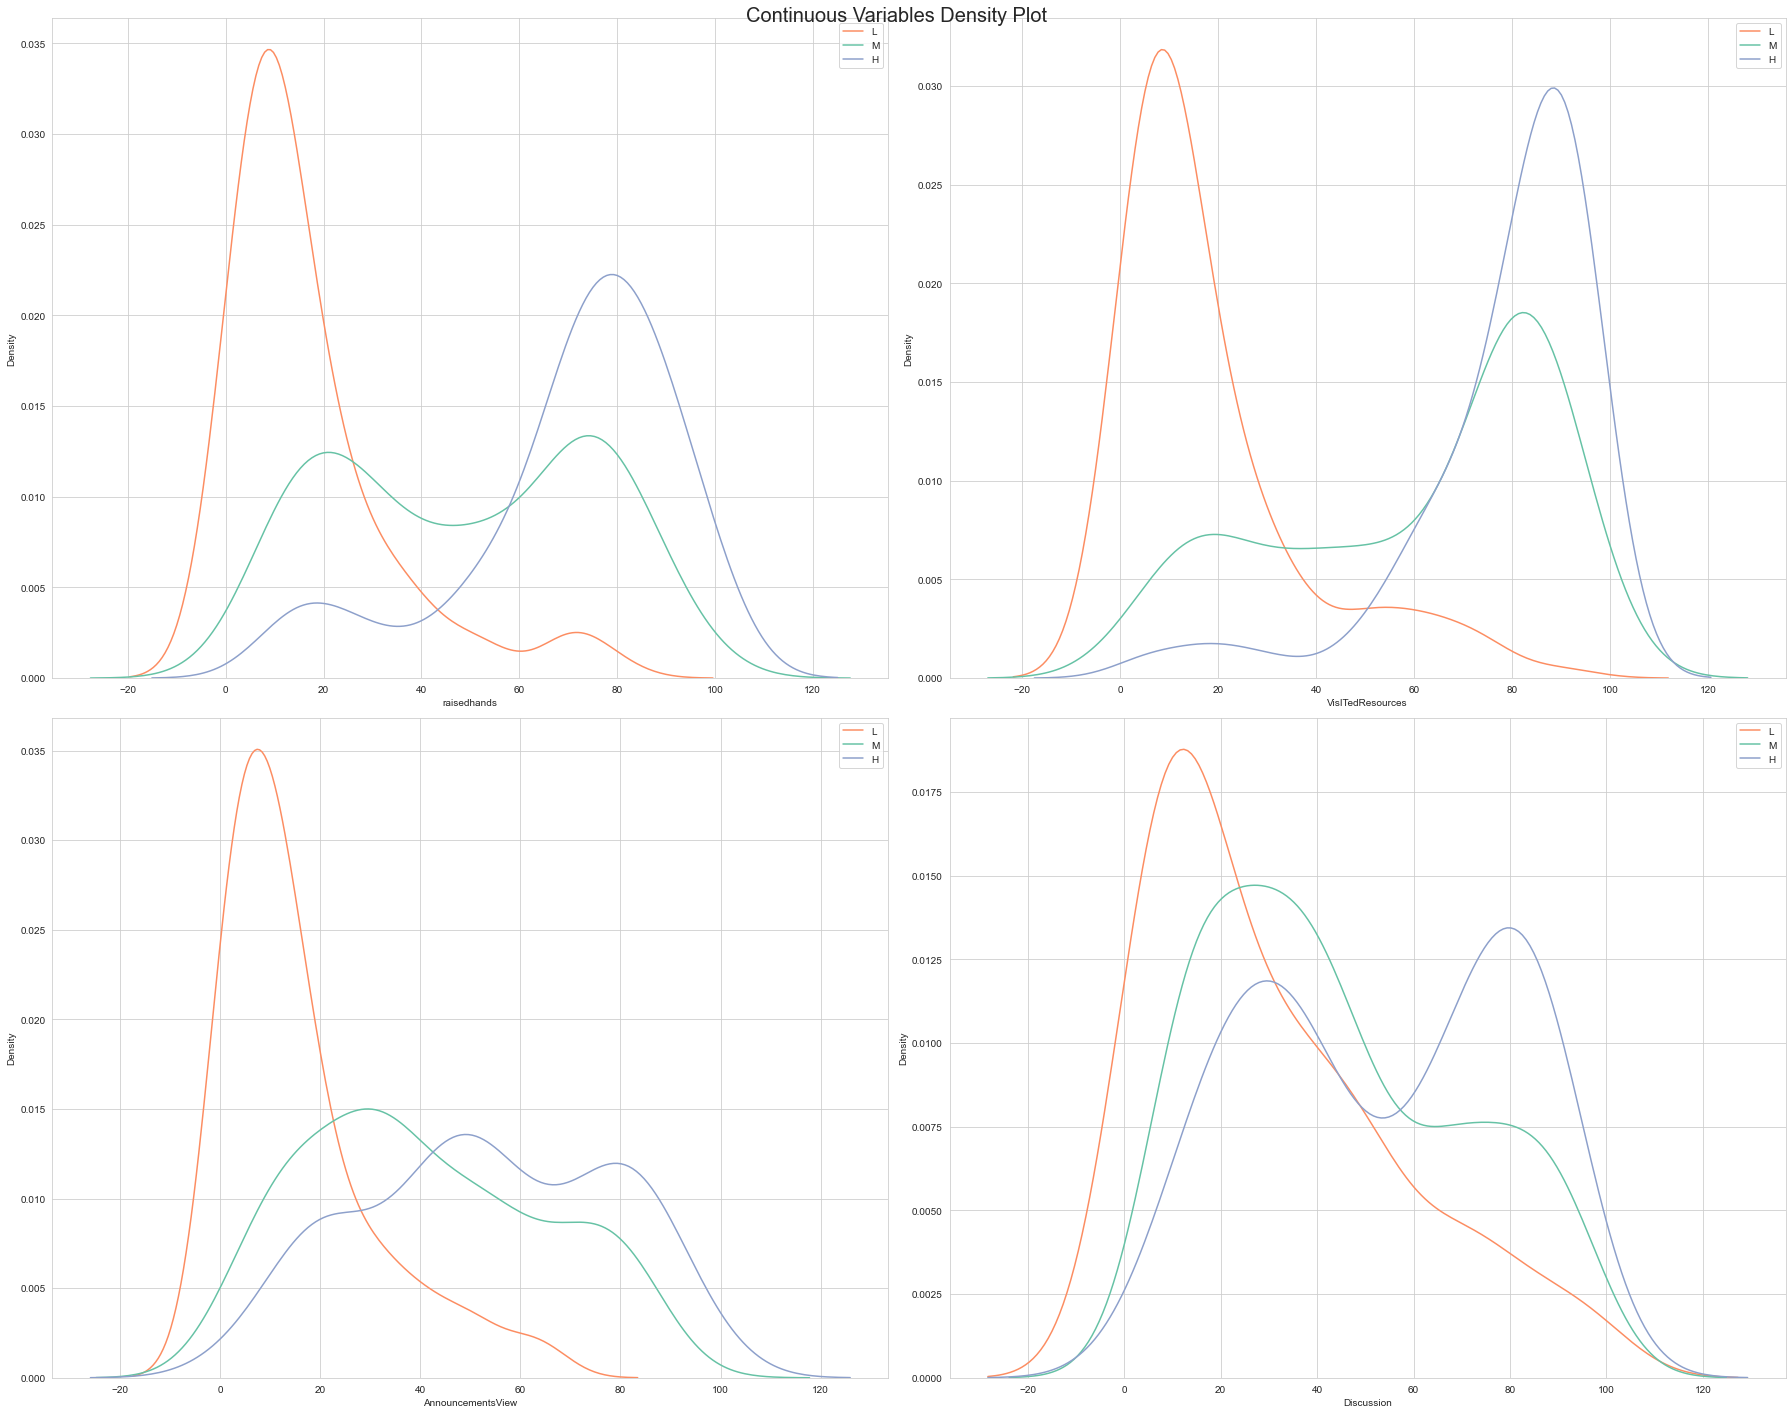

In [61]:
plt.figure(figsize=(25, 20))

for i in range(1, len(num_cols) + 1):
    plt.subplot(2, 2, i)
    sns.distplot(df.loc[df.Class == 'L'][num_cols[i-1]], color=qualitative_colors[1], hist=False)
    sns.distplot(df.loc[df.Class == 'M'][num_cols[i-1]], color=qualitative_colors[0], hist=False)
    sns.distplot(df.loc[df.Class == 'H'][num_cols[i-1]], color=qualitative_colors[2], hist=False)
    plt.legend(('L', 'M', 'H'))

plt.suptitle('Continuous Variables Density Plot', fontsize=20)
plt.tight_layout()
plt.show()

Conclusion:
1. Students who raise hands more are scoring more and vice versa.
2. Students who visit resources more are scoring more and vice versa.
3. Students who discuss more are scoring more and vice versa.
4. Students who view new announcements more are scoring more and vice versa.

### Lable Encoding

In [97]:
encoded_df = df[cat_cols_all].apply(LabelEncoder().fit_transform)
encoded_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


In [98]:
data = pd.concat([encoded_df, df[num_cols]], axis=1)
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,2,1,0,7,0,0,1,1,1,2,15,16,2,20
1,1,4,4,2,1,0,7,0,0,1,1,1,2,20,20,3,25
2,1,4,4,2,1,0,7,0,0,0,0,0,1,10,7,0,30
3,1,4,4,2,1,0,7,0,0,0,0,0,1,30,25,5,35
4,1,4,4,2,1,0,7,0,0,0,0,0,2,40,50,12,50


In [64]:
data.corr()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
gender,1.000000,-0.023653,-0.064895,-0.017793,0.016869,0.054907,0.031769,0.049156,-0.195142,-0.022359,-0.093478,-0.209011,0.123675,-0.149978,-0.210932,-0.052139,-0.124703
NationalITy,-0.023653,1.000000,0.786798,-0.139212,0.124049,0.069712,0.076718,0.070503,0.003212,0.079380,-0.001701,0.157116,-0.077785,0.111533,0.028793,0.062827,-0.063386
PlaceofBirth,-0.064895,0.786798,1.000000,-0.176368,0.174026,0.085178,0.143477,0.078554,0.031632,0.040887,-0.094594,0.134554,-0.098975,0.077986,0.033798,0.078636,0.006262
StageID,-0.017793,-0.139212,-0.176368,1.000000,-0.961835,0.296416,-0.047493,-0.029512,0.034205,-0.114025,0.014272,-0.112536,-0.011696,-0.172751,-0.068621,-0.163666,-0.161406
GradeID,0.016869,0.124049,0.174026,-0.961835,1.000000,-0.303949,0.061389,0.066079,-0.033602,0.118246,-0.018421,0.088342,0.013483,0.182621,0.078262,0.183033,0.168462
SectionID,0.054907,0.069712,0.085178,0.296416,-0.303949,1.000000,0.267445,0.046763,0.005783,-0.018449,-0.070405,0.037062,0.017597,-0.143862,-0.080909,-0.144955,-0.102538
Topic,0.031769,0.076718,0.143477,-0.047493,0.061389,0.267445,1.000000,-0.035975,-0.139487,0.004730,-0.064087,-0.036537,0.103610,-0.080418,-0.118144,-0.063856,0.054064
Semester,0.049156,0.070503,0.078554,-0.029512,0.066079,0.046763,-0.035975,1.000000,0.148705,0.023628,-0.025258,0.072462,-0.043287,0.178358,0.173219,0.287066,0.019083
Relation,-0.195142,0.003212,0.031632,0.034205,-0.033602,0.005783,-0.139487,0.148705,1.000000,0.163811,0.287698,0.219687,-0.272111,0.364237,0.360240,0.339505,0.026720
ParentAnsweringSurvey,-0.022359,0.079380,0.040887,-0.114025,0.118246,-0.018449,0.004730,0.023628,0.163811,1.000000,0.539875,0.261152,-0.123254,0.316570,0.382472,0.396357,0.232197


<AxesSubplot:>

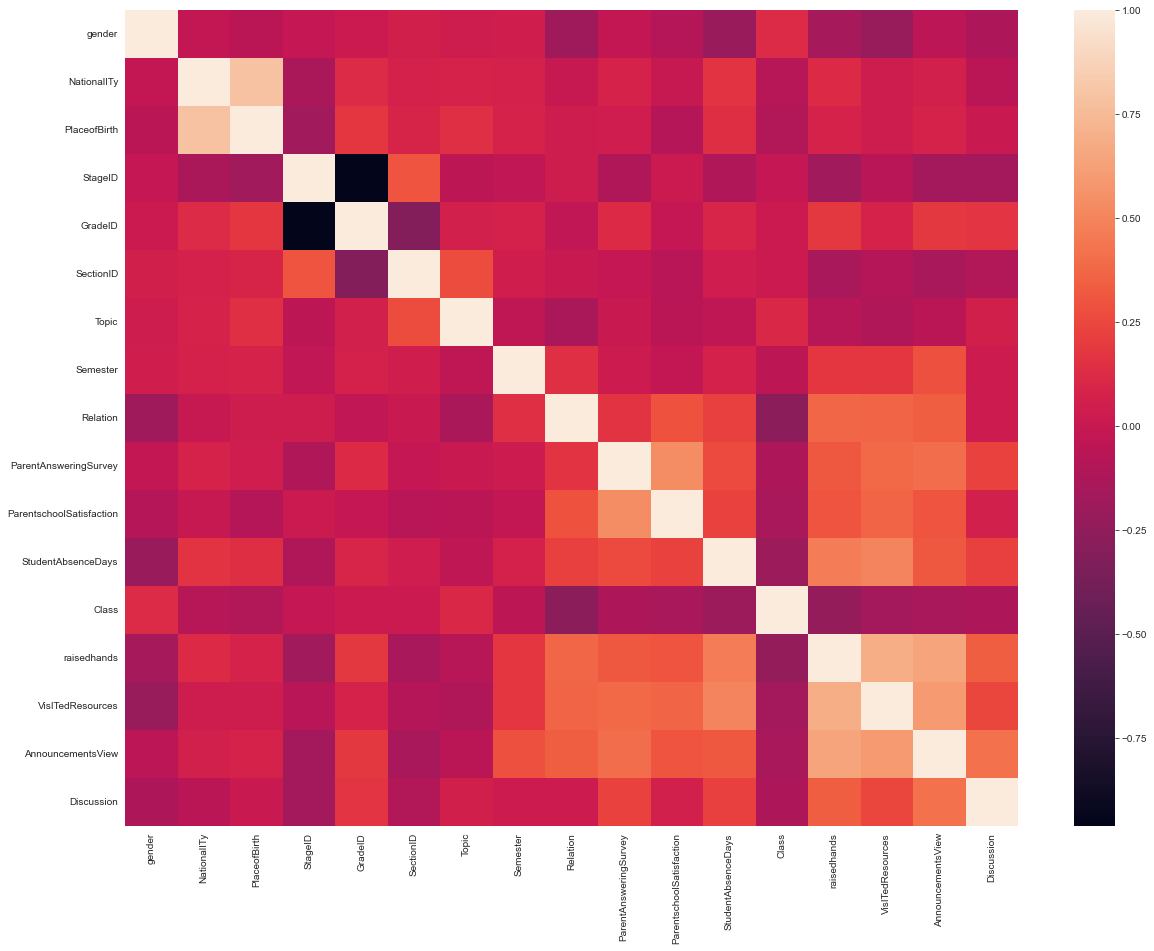

In [65]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr())

### Train Test Split

In [99]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(384, 16) (96, 16) (384,) (96,)


### Logistic Regression Model Building

In [67]:
model = LogisticRegression()
fitted_model = model.fit(X_train, y_train)

In [68]:
fitted_model.intercept_

array([-0.53620219,  0.45679208,  0.07941011])

In [69]:
fitted_model.feature_names_in_

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion'], dtype=object)

In [70]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
132,1,4,4,2,0,2,7,1,0,0,0,0,0,3,10,3,1
228,1,4,4,0,8,1,8,1,1,1,1,0,73,84,77,81,0
473,1,7,7,1,5,0,5,1,0,1,1,1,85,88,79,70,2
42,1,4,4,0,6,0,7,0,0,1,1,0,10,12,7,33,1
360,1,3,3,2,0,0,0,0,0,1,1,0,20,88,31,28,2


### Prediction on Train Data

In [71]:
train['Predicted_Class']= fitted_model.predict(X_train)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted_Class
132,1,4,4,2,0,2,7,1,0,0,0,0,0,3,10,3,1,1
228,1,4,4,0,8,1,8,1,1,1,1,0,73,84,77,81,0,2
473,1,7,7,1,5,0,5,1,0,1,1,1,85,88,79,70,2,2
42,1,4,4,0,6,0,7,0,0,1,1,0,10,12,7,33,1,1
360,1,3,3,2,0,0,0,0,0,1,1,0,20,88,31,28,2,2


In [72]:
print(classification_report(train['Class'], train['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       120
           1       0.80      0.83      0.82       101
           2       0.68      0.71      0.69       163

    accuracy                           0.73       384
   macro avg       0.74      0.73      0.73       384
weighted avg       0.73      0.73      0.73       384



#### Accuracy on train data: 0.73

### Prediction on Test Data

In [73]:
test = pd.concat([X_test,y_test], axis=1)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
73,0,4,4,1,4,0,3,0,0,1,0,0,19,30,26,19,2
414,0,5,5,1,4,1,1,0,1,0,1,0,10,9,2,1,1
394,1,3,7,1,4,0,1,0,1,1,1,1,78,91,50,40,0
277,1,7,3,1,3,0,3,1,1,1,1,1,92,31,42,27,0
399,1,7,7,1,4,0,1,1,0,1,1,1,89,92,89,83,0


In [74]:
test['Predicted_Class'] = fitted_model.predict(X_test)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted_Class
73,0,4,4,1,4,0,3,0,0,1,0,0,19,30,26,19,2,2
414,0,5,5,1,4,1,1,0,1,0,1,0,10,9,2,1,1,1
394,1,3,7,1,4,0,1,0,1,1,1,1,78,91,50,40,0,0
277,1,7,3,1,3,0,3,1,1,1,1,1,92,31,42,27,0,2
399,1,7,7,1,4,0,1,1,0,1,1,1,89,92,89,83,0,0


In [75]:
print(classification_report(test['Class'], test['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56        22
           1       0.81      0.96      0.88        26
           2       0.76      0.58      0.66        48

    accuracy                           0.70        96
   macro avg       0.69      0.73      0.70        96
weighted avg       0.71      0.70      0.70        96



#### Accuracy on Test Data: 0.70

Another way of building model

In [104]:
model_alt = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=1000)
fitted_model_alt = model_alt.fit(X_train, y_train)

In [105]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
132,1,4,4,2,0,2,7,1,0,0,0,0,0,3,10,3,1
228,1,4,4,0,8,1,8,1,1,1,1,0,73,84,77,81,0
473,1,7,7,1,5,0,5,1,0,1,1,1,85,88,79,70,2
42,1,4,4,0,6,0,7,0,0,1,1,0,10,12,7,33,1
360,1,3,3,2,0,0,0,0,0,1,1,0,20,88,31,28,2


In [106]:
train['Predicted_Class']= fitted_model_alt.predict(X_train)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted_Class
132,1,4,4,2,0,2,7,1,0,0,0,0,0,3,10,3,1,1
228,1,4,4,0,8,1,8,1,1,1,1,0,73,84,77,81,0,2
473,1,7,7,1,5,0,5,1,0,1,1,1,85,88,79,70,2,0
42,1,4,4,0,6,0,7,0,0,1,1,0,10,12,7,33,1,1
360,1,3,3,2,0,0,0,0,0,1,1,0,20,88,31,28,2,2


In [107]:
print(classification_report(train['Class'], train['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       120
           1       0.89      0.86      0.87       101
           2       0.75      0.75      0.75       163

    accuracy                           0.79       384
   macro avg       0.80      0.79      0.80       384
weighted avg       0.79      0.79      0.79       384



* Conclusion: Training accuracy has increased from 0.73 to 0.79 with Multinomial Logistic Regression.

In [108]:
test = pd.concat([X_test, y_test], axis= 1)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
73,0,4,4,1,4,0,3,0,0,1,0,0,19,30,26,19,2
414,0,5,5,1,4,1,1,0,1,0,1,0,10,9,2,1,1
394,1,3,7,1,4,0,1,0,1,1,1,1,78,91,50,40,0
277,1,7,3,1,3,0,3,1,1,1,1,1,92,31,42,27,0
399,1,7,7,1,4,0,1,1,0,1,1,1,89,92,89,83,0


In [109]:
test['Predicted_Class'] = fitted_model_alt.predict(X_test)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted_Class
73,0,4,4,1,4,0,3,0,0,1,0,0,19,30,26,19,2,1
414,0,5,5,1,4,1,1,0,1,0,1,0,10,9,2,1,1,1
394,1,3,7,1,4,0,1,0,1,1,1,1,78,91,50,40,0,0
277,1,7,3,1,3,0,3,1,1,1,1,1,92,31,42,27,0,2
399,1,7,7,1,4,0,1,1,0,1,1,1,89,92,89,83,0,0


In [110]:
print(classification_report(test['Class'], test['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68        22
           1       0.80      0.92      0.86        26
           2       0.79      0.77      0.78        48

    accuracy                           0.78        96
   macro avg       0.77      0.78      0.77        96
weighted avg       0.78      0.78      0.78        96



* Conclusion: Testing accuracy has incresed from 0.70 to 0.78 with Multinomial Logistic Regression.

Refernces Used: https://www.kaggle.com/code/sarahyoun/students-academic-performance-prediction